In [1]:
import networkx as nx
import pandas as pd
import ndlib.models.epidemics as ep
from bokeh.io import output_notebook, show
from ndlib.viz.bokeh.DiffusionTrend import DiffusionTrend
import ndlib.models.ModelConfig as mc
from ndlib.viz.bokeh.MultiPlot import MultiPlot
import matplotlib.pyplot as plt
import numpy as np
import random

In [ ]:
# Helper functions

def config_SIR(model, beta, gamma, fraction_infected):
    '''Takes the SIR model as input and its parameters
    Configures said model with these parameters.'''
    config = mc.Configuration()
    config.add_model_parameter('beta', beta)
    config.add_model_parameter('gamma', gamma)
    config.add_model_parameter("fraction_infected", fraction_infected)
    model.set_initial_status(config)
    
    
def get_SIR_result_lists(results):
    '''Takes SIR simulation results (model.build_trends(iterations)) as input variable
    Unpacks this variable and outputs S, I, R node count as lists.'''
    S_node_count = results[0]['trends']['node_count'][0]
    I_node_count = results[0]['trends']['node_count'][1]
    R_node_count = results[0]['trends']['node_count'][2]
    return S_node_count, I_node_count, R_node_count

**Investigate the effect of network parameters on the spread**

In [ ]:
#Simulate Erdos-Reyni (random) network. Investigate the effect of p on the spread of disease (SIR).

p_variations = [0.04, 0.07, 0.1, 0.13, 0.16]
beta = 0.001
gamma = 0.01
fraction_infected = 0.05
time_steps = 200
N = 1000

time = np.linspace(0, time_steps, time_steps)
plt.figure(figsize=(10, 6))

for p in p_variations:
    # Network Definition
    g = nx.erdos_renyi_graph(N, p)
    
    # Import SIR
    model = ep.SIRModel(g)
    
    config_SIR(model, beta, gamma, fraction_infected)

    # Simulation
    iterations = model.iteration_bunch(time_steps)
    trends = model.build_trends(iterations)
    S_node_count, I_node_count, R_node_count = get_SIR_result_lists(trends)
    
    #Plot
    plt.plot(time, I_node_count, label = f'p = {p}')
    plt.xlabel('Time')
    plt.ylabel('Number of Infected nodes')
    plt.title('The effect of parameter p on the spread of disease (SIR)\nin the Erdos-Reyni (random) network')
    plt.legend()
    plt.grid(True)

In [ ]:
#Simulate Barabasi Albert (scale-free) network. Investigate the effect of m on the spread of disease (SIR).

m_variations = [1, 2, 3, 4, 5]
beta = 0.3
gamma = 0.1
fraction_infected = 0.05
time_steps = 30
N = 1000

time = np.linspace(0, time_steps, time_steps)
plt.figure(figsize=(10, 6))

for m in m_variations:
    # Network Definition
    g = nx.barabasi_albert_graph(N, m)
    
    # Import SIR
    model = ep.SIRModel(g)
    
    config_SIR(model, beta, gamma, fraction_infected)

    # Simulation
    iterations = model.iteration_bunch(time_steps)
    trends = model.build_trends(iterations)
    S_node_count, I_node_count, R_node_count = get_SIR_result_lists(trends)
    
    #Plot
    plt.plot(time, I_node_count, label = f'm = {m}')
    plt.xlabel('Time')
    plt.ylabel('Number of Infected nodes')
    plt.title('The effect of parameter m on the spread of disease (SIR)\nin the Barabasi Albert (scale-free) network')
    plt.legend()
    plt.grid(True)

In [ ]:
#Simulate Watts-Strogatz (small worlds) network. Investigate the effect of k on the spread of disease (SIR).

k_variations = [5, 7, 9, 11, 13]
prob = 0.05
beta = 0.3
gamma = 0.1
fraction_infected = 0.05
time_steps = 30
N = 1000

time = np.linspace(0, time_steps, time_steps)
plt.figure(figsize=(10, 6))

for k in k_variations:
    # Network Definition
    g = nx.watts_strogatz_graph(N, k, prob)
    
    # Import SIR
    model = ep.SIRModel(g)
    
    config_SIR(model, beta, gamma, fraction_infected)

    # Simulation
    iterations = model.iteration_bunch(time_steps)
    trends = model.build_trends(iterations)
    S_node_count, I_node_count, R_node_count = get_SIR_result_lists(trends)
    
    #Plot
    plt.plot(time, I_node_count, label = f'm = {k}')
    plt.xlabel('Time')
    plt.ylabel('Number of Infected nodes')
    plt.title('The effect of parameter k on the spread of disease (SIR)\nin the Watts-Strogatz (small worlds) network')
    plt.legend()
    plt.grid(True)
    
    
#Simulate Watts-Strogatz (small worlds) network. Investigate the effect of p (prob) on the spread of disease (SIR).

k = 5
prob_variations = [0.05, 0.10, 0.15, 0.25]
beta = 0.3
gamma = 0.1
fraction_infected = 0.05
time_steps = 30
N = 1000

time = np.linspace(0, time_steps, time_steps)
plt.figure(figsize=(10, 6))

for prob in prob_variations:
    # Network Definition
    g = nx.watts_strogatz_graph(N, k, prob)
    
    # Import SIR
    model = ep.SIRModel(g)
    
    config_SIR(model, beta, gamma, fraction_infected)

    # Simulation
    iterations = model.iteration_bunch(time_steps)
    trends = model.build_trends(iterations)
    S_node_count, I_node_count, R_node_count = get_SIR_result_lists(trends)
    
    #Plot
    plt.plot(time, I_node_count, label = f'p = {prob}')
    plt.xlabel('Time')
    plt.ylabel('Number of Infected nodes')
    plt.title('The effect of parameter p on the spread of disease (SIR)\nin the Watts-Strogatz (small worlds) network')
    plt.legend()
    plt.grid(True)

**Generate Networks of equivalent form**

## Vaccination

In [2]:
# Read your data into a Pandas DataFrame
data = pd.read_csv('transmission_network.csv', delimiter=';')

In [3]:
print(data.shape)

(374, 375)


In [4]:
data = data.drop(columns=['Unnamed: 0'])  # Remove the extra column
adjacency_matrix = data.values

In [5]:
G = nx.Graph(adjacency_matrix)

In [ ]:
print("Number of nodes:", len(G.nodes()))
print("Number of edges:", len(G.edges()))

In [ ]:
# Create a layout for the graph
layout = nx.spring_layout(G)

# Draw the nodes and edges
nx.draw(G, layout, with_labels=True, node_size=300, node_color='skyblue', font_size=8)

# Draw edge weights, if available
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, layout, edge_labels=labels, font_size=8)

# Show the graph
plt.title("Your Network Graph")
plt.show()

In [ ]:
node_degrees = dict(G.degree())

In [ ]:
type(node_degrees)

In [ ]:
sorted_nodes = sorted(node_degrees, key=lambda x: node_degrees[x], reverse=True)


In [ ]:
degree_centrality = nx.degree_centrality(G)
closeness_centrality = nx.closeness_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G)

# Define a threshold for identifying hub nodes
threshold = 0.35 # Adjust the threshold as needed

# Identify hub nodes based on centrality measures and threshold
hub_nodes = [node for node in G.nodes() if (degree_centrality[node] > threshold or
                                           closeness_centrality[node] > threshold or
                                           betweenness_centrality[node] > threshold)]

print("Hub Nodes:", hub_nodes)

In [ ]:
# Basic Network Statistics
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
density = nx.density(G)

print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Network density: {density}")

# Degree Distribution
degree_sequence = [d for n, d in G.degree()]
avg_degree = sum(degree_sequence) / num_nodes

print(f"Average degree: {avg_degree}")

# Clustering Coefficient
avg_clustering = nx.average_clustering(G)

print(f"Average clustering coefficient: {avg_clustering}")

if nx.is_connected(G):
    avg_shortest_path = nx.average_shortest_path_length(G)
    print(f"Average shortest path length: {avg_shortest_path}")
else:
    # If the graph is not connected, compute the average shortest path for each component
    for component in nx.connected_components(G):
        subgraph = G.subgraph(component)
        avg_shortest_path = nx.average_shortest_path_length(subgraph)
        print(f"Average shortest path length for component: {avg_shortest_path}")
# Community Detection (using the Louvain algorithm)
from community import best_partition
partition = best_partition(G)

# Visualization (you can adjust parameters for your specific network)
# Note: Visualization works best for small to moderately-sized networks
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_size=100)
plt.show()

In [8]:
# Calculate degree distribution
degree_sequence = sorted([d for n, d in G.degree()], reverse=True)

# Calculate clustering coefficient
clustering_coefficient = nx.average_clustering(G)

# Calculate degree centrality for each node
degree_centrality = nx.degree_centrality(G)

# Calculate betweenness centrality for each node
betweenness_centrality = nx.betweenness_centrality(G)

# Print the results
print(f"Degree Distribution: {degree_sequence}")
print(f"Average Clustering Coefficient: {clustering_coefficient}")
print(f"Degree Centrality: {degree_centrality}")
print(f"Betweenness Centrality: {betweenness_centrality}")

Degree Distribution: [47, 38, 36, 33, 33, 28, 27, 26, 25, 24, 24, 23, 23, 23, 23, 23, 22, 21, 20, 20, 20, 20, 20, 19, 18, 18, 17, 17, 16, 16, 16, 15, 15, 15, 15, 15, 15, 15, 14, 14, 14, 13, 13, 13, 13, 13, 13, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 11, 11, 11, 11, 11, 11, 11, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 

# Null Strategy

In [ ]:
# Assuming adjacency_matrix is a NumPy array representing the adjacency matrix
G = nx.Graph(adjacency_matrix)

Testing with Vaccination Budget: 1, Test Accuracy: 0.5
Iteration 1: Infected=159, Susceptible=214, Removed=1
Iteration 2: Infected=269, Susceptible=99, Removed=6
Iteration 3: Infected=309, Susceptible=51, Removed=14
Iteration 4: Infected=314, Susceptible=34, Removed=26
Iteration 5: Infected=315, Susceptible=25, Removed=34
Iteration 6: Infected=312, Susceptible=22, Removed=40
Iteration 7: Infected=305, Susceptible=21, Removed=48
Iteration 8: Infected=297, Susceptible=19, Removed=58
Iteration 9: Infected=283, Susceptible=18, Removed=73
Iteration 10: Infected=277, Susceptible=17, Removed=80


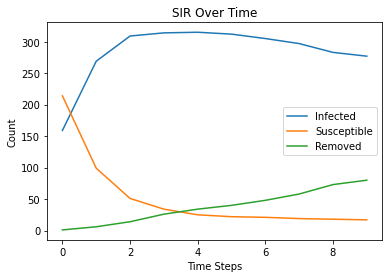

Testing with Vaccination Budget: 1, Test Accuracy: 0.75
Iteration 1: Infected=62, Susceptible=311, Removed=1
Iteration 2: Infected=199, Susceptible=171, Removed=4
Iteration 3: Infected=283, Susceptible=76, Removed=15
Iteration 4: Infected=303, Susceptible=43, Removed=28
Iteration 5: Infected=299, Susceptible=34, Removed=41
Iteration 6: Infected=295, Susceptible=28, Removed=51
Iteration 7: Infected=282, Susceptible=24, Removed=68
Iteration 8: Infected=271, Susceptible=20, Removed=83
Iteration 9: Infected=261, Susceptible=19, Removed=94
Iteration 10: Infected=252, Susceptible=18, Removed=104


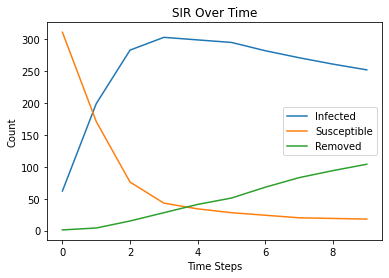

Testing with Vaccination Budget: 1, Test Accuracy: 1.0
Iteration 1: Infected=18, Susceptible=355, Removed=1
Iteration 2: Infected=121, Susceptible=251, Removed=2
Iteration 3: Infected=256, Susceptible=109, Removed=9
Iteration 4: Infected=287, Susceptible=62, Removed=25
Iteration 5: Infected=289, Susceptible=45, Removed=40
Iteration 6: Infected=284, Susceptible=35, Removed=55
Iteration 7: Infected=273, Susceptible=29, Removed=72
Iteration 8: Infected=259, Susceptible=26, Removed=89
Iteration 9: Infected=243, Susceptible=25, Removed=106
Iteration 10: Infected=230, Susceptible=24, Removed=120


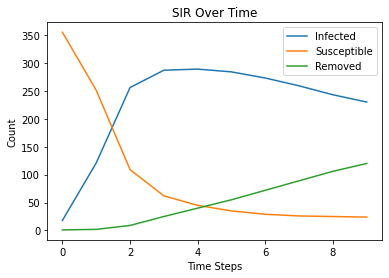

Testing with Vaccination Budget: 3, Test Accuracy: 0.5
Iteration 1: Infected=34, Susceptible=337, Removed=3
Iteration 2: Infected=222, Susceptible=146, Removed=6
Iteration 3: Infected=284, Susceptible=76, Removed=14
Iteration 4: Infected=303, Susceptible=49, Removed=22
Iteration 5: Infected=311, Susceptible=33, Removed=30
Iteration 6: Infected=308, Susceptible=26, Removed=40
Iteration 7: Infected=306, Susceptible=20, Removed=48
Iteration 8: Infected=299, Susceptible=17, Removed=58
Iteration 9: Infected=296, Susceptible=12, Removed=66
Iteration 10: Infected=285, Susceptible=9, Removed=80


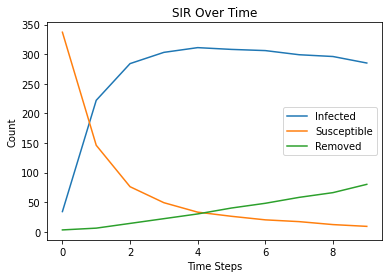

Testing with Vaccination Budget: 3, Test Accuracy: 0.75
Iteration 1: Infected=97, Susceptible=274, Removed=3
Iteration 2: Infected=246, Susceptible=119, Removed=9
Iteration 3: Infected=290, Susceptible=63, Removed=21
Iteration 4: Infected=299, Susceptible=44, Removed=31
Iteration 5: Infected=302, Susceptible=29, Removed=43
Iteration 6: Infected=289, Susceptible=25, Removed=60
Iteration 7: Infected=278, Susceptible=18, Removed=78
Iteration 8: Infected=266, Susceptible=14, Removed=94
Iteration 9: Infected=256, Susceptible=10, Removed=108
Iteration 10: Infected=244, Susceptible=7, Removed=123


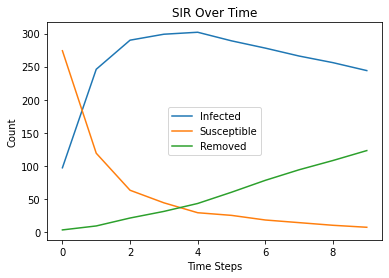

Testing with Vaccination Budget: 3, Test Accuracy: 1.0
Iteration 1: Infected=147, Susceptible=224, Removed=3
Iteration 2: Infected=276, Susceptible=81, Removed=17
Iteration 3: Infected=295, Susceptible=43, Removed=36
Iteration 4: Infected=288, Susceptible=29, Removed=57
Iteration 5: Infected=281, Susceptible=21, Removed=72
Iteration 6: Infected=264, Susceptible=18, Removed=92
Iteration 7: Infected=253, Susceptible=15, Removed=106
Iteration 8: Infected=240, Susceptible=12, Removed=122
Iteration 9: Infected=227, Susceptible=9, Removed=138
Iteration 10: Infected=218, Susceptible=6, Removed=150


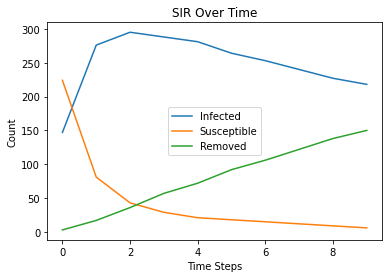

Testing with Vaccination Budget: 5, Test Accuracy: 0.5
Iteration 1: Infected=131, Susceptible=238, Removed=5
Iteration 2: Infected=247, Susceptible=113, Removed=14
Iteration 3: Infected=278, Susceptible=72, Removed=24
Iteration 4: Infected=294, Susceptible=45, Removed=35
Iteration 5: Infected=294, Susceptible=32, Removed=48
Iteration 6: Infected=289, Susceptible=21, Removed=64
Iteration 7: Infected=283, Susceptible=14, Removed=77
Iteration 8: Infected=271, Susceptible=9, Removed=94
Iteration 9: Infected=265, Susceptible=3, Removed=106
Iteration 10: Infected=259, Susceptible=0, Removed=115


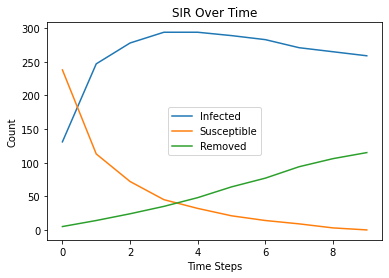

Testing with Vaccination Budget: 5, Test Accuracy: 0.75
Iteration 1: Infected=45, Susceptible=324, Removed=5
Iteration 2: Infected=179, Susceptible=184, Removed=11
Iteration 3: Infected=275, Susceptible=74, Removed=25
Iteration 4: Infected=284, Susceptible=48, Removed=42
Iteration 5: Infected=281, Susceptible=35, Removed=58
Iteration 6: Infected=275, Susceptible=25, Removed=74
Iteration 7: Infected=266, Susceptible=17, Removed=91
Iteration 8: Infected=252, Susceptible=12, Removed=110
Iteration 9: Infected=246, Susceptible=7, Removed=121
Iteration 10: Infected=241, Susceptible=2, Removed=131


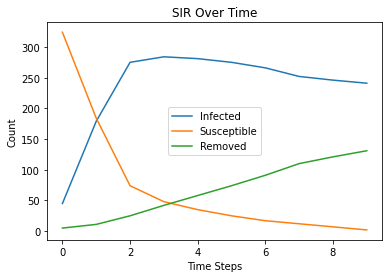

Testing with Vaccination Budget: 5, Test Accuracy: 1.0
Iteration 1: Infected=34, Susceptible=335, Removed=5
Iteration 2: Infected=209, Susceptible=151, Removed=14
Iteration 3: Infected=275, Susceptible=72, Removed=27
Iteration 4: Infected=284, Susceptible=44, Removed=46
Iteration 5: Infected=281, Susceptible=27, Removed=66
Iteration 6: Infected=271, Susceptible=18, Removed=85
Iteration 7: Infected=256, Susceptible=13, Removed=105
Iteration 8: Infected=242, Susceptible=7, Removed=125
Iteration 9: Infected=226, Susceptible=2, Removed=146
Iteration 10: Infected=215, Susceptible=0, Removed=159


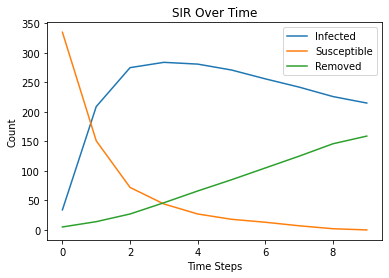

Testing with Vaccination Budget: 10, Test Accuracy: 0.5
Iteration 1: Infected=45, Susceptible=319, Removed=10
Iteration 2: Infected=172, Susceptible=181, Removed=21
Iteration 3: Infected=258, Susceptible=81, Removed=35
Iteration 4: Infected=274, Susceptible=47, Removed=53
Iteration 5: Infected=277, Susceptible=26, Removed=71
Iteration 6: Infected=272, Susceptible=14, Removed=88
Iteration 7: Infected=265, Susceptible=4, Removed=105
Iteration 8: Infected=259, Susceptible=0, Removed=115
Iteration 9: Infected=252, Susceptible=0, Removed=122
Iteration 10: Infected=245, Susceptible=0, Removed=129


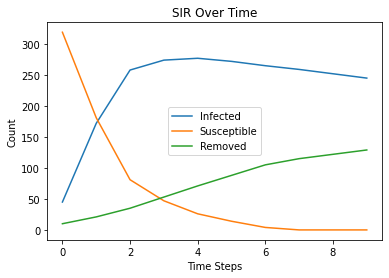

Testing with Vaccination Budget: 10, Test Accuracy: 0.75
Iteration 1: Infected=34, Susceptible=330, Removed=10
Iteration 2: Infected=205, Susceptible=149, Removed=20
Iteration 3: Infected=260, Susceptible=76, Removed=38
Iteration 4: Infected=267, Susceptible=46, Removed=61
Iteration 5: Infected=262, Susceptible=27, Removed=85
Iteration 6: Infected=253, Susceptible=15, Removed=106
Iteration 7: Infected=244, Susceptible=5, Removed=125
Iteration 8: Infected=236, Susceptible=0, Removed=138
Iteration 9: Infected=226, Susceptible=0, Removed=148
Iteration 10: Infected=217, Susceptible=0, Removed=157


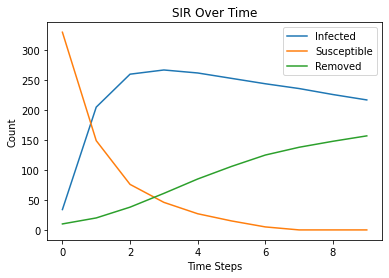

Testing with Vaccination Budget: 10, Test Accuracy: 1.0
Iteration 1: Infected=19, Susceptible=345, Removed=10
Iteration 2: Infected=125, Susceptible=228, Removed=21
Iteration 3: Infected=230, Susceptible=107, Removed=37
Iteration 4: Infected=259, Susceptible=54, Removed=61
Iteration 5: Infected=260, Susceptible=29, Removed=85
Iteration 6: Infected=256, Susceptible=16, Removed=102
Iteration 7: Infected=243, Susceptible=6, Removed=125
Iteration 8: Infected=230, Susceptible=0, Removed=144
Iteration 9: Infected=223, Susceptible=0, Removed=151
Iteration 10: Infected=209, Susceptible=0, Removed=165


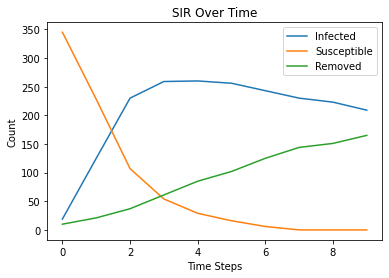

In [15]:
# Parameters
total_tests = 200
max_tests_per_iteration = 20
vaccination_budgets = [1, 3, 5, 10]
test_accuracies = [0.5, 0.75, 1.0]
transmission_probability = 0.35

# Create a random network (you can replace this with your specific network)
G = nx.Graph(adjacency_matrix)

def run_simulation(G, initial_infected, total_tests, max_tests_per_iteration, vaccination_budget, test_accuracy, transmission_probability):
    # Initialize the status of nodes: 0 for susceptible, 1 for infected, and 2 for removed
    node_status = {node: 0 for node in G.nodes()}

    # Select a random initial set of infected nodes
    initial_infected_nodes = random.sample(list(G.nodes()), initial_infected)
    for node in initial_infected_nodes:
        node_status[node] = 1

    # Lists to store SIR counts at each step
    infected_counts = []
    susceptible_counts = []
    removed_counts = []

    # Run the simulation
    for iteration in range(total_tests // max_tests_per_iteration):
        # Perform testing
        tested_nodes = random.sample(list(G.nodes()), max_tests_per_iteration)
        for node in tested_nodes:
            if node_status[node] == 1 and random.random() <= test_accuracy:
                # Node is infected and the test is accurate
                node_status[node] = 2  # Move to the removed state

        # Calculate the number of remaining vaccinations that can be performed in this iteration
        remaining_vaccinations = min(vaccination_budget, sum(1 for node in G.nodes() if node_status[node] == 0))
        # Perform vaccination with the remaining budget
        vaccinated_nodes = random.sample([node for node in G.nodes() if node_status[node] == 0], remaining_vaccinations)
        for node in vaccinated_nodes:
            node_status[node] = 2  # Move to the removed state

        # Disease spread: Infected nodes can infect susceptible neighbors
        for node in G.nodes():
            if node_status[node] == 1:  # Node is infected
                neighbors = list(G.neighbors(node))
                for neighbor in neighbors:
                    if node_status[neighbor] == 0 and random.random() <= transmission_probability:
                        node_status[neighbor] = 1  # Neighbor becomes infected

        # Calculate SIR counts at this step
        infected_count = sum(1 for status in node_status.values() if status == 1)
        susceptible_count = sum(1 for status in node_status.values() if status == 0)
        removed_count = sum(1 for status in node_status.values() if status == 2)

        infected_counts.append(infected_count)
        susceptible_counts.append(susceptible_count)
        removed_counts.append(removed_count)

        print(f"Iteration {iteration + 1}: Infected={infected_count}, Susceptible={susceptible_count}, Removed={removed_count}")

    # Plot SIR counts over time
    plt.plot(infected_counts, label='Infected')
    plt.plot(susceptible_counts, label='Susceptible')
    plt.plot(removed_counts, label='Removed')
    plt.xlabel('Time Steps')
    plt.ylabel('Count')
    plt.legend()
    plt.title('SIR Over Time')
    plt.show()

# Test different combinations of vaccination budgets and test accuracies
for vaccination_budget in vaccination_budgets:
    for test_accuracy in test_accuracies:
        print(f"Testing with Vaccination Budget: {vaccination_budget}, Test Accuracy: {test_accuracy}")
        run_simulation(G, initial_infected=5, total_tests=total_tests, max_tests_per_iteration=max_tests_per_iteration, vaccination_budget=vaccination_budget, test_accuracy=test_accuracy, transmission_probability=transmission_probability)

# Dynamic Vacciantion

In [ ]:
G = nx.Graph(adjacency_matrix)

Testing with Vaccination Budget: 1, Test Accuracy: 0.5
Iteration 1: Infected=128, Susceptible=245, Removed=1
Iteration 2: Infected=275, Susceptible=94, Removed=5
Iteration 3: Infected=308, Susceptible=54, Removed=12
Iteration 4: Infected=314, Susceptible=42, Removed=18
Iteration 5: Infected=313, Susceptible=35, Removed=26
Iteration 6: Infected=310, Susceptible=32, Removed=32
Iteration 7: Infected=305, Susceptible=28, Removed=41
Iteration 8: Infected=297, Susceptible=25, Removed=52
Iteration 9: Infected=286, Susceptible=25, Removed=63
Iteration 10: Infected=279, Susceptible=25, Removed=70


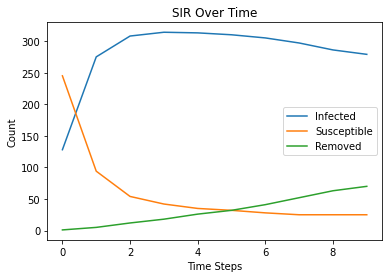

Testing with Vaccination Budget: 1, Test Accuracy: 0.75
Iteration 1: Infected=59, Susceptible=314, Removed=1
Iteration 2: Infected=232, Susceptible=139, Removed=3
Iteration 3: Infected=294, Susceptible=70, Removed=10
Iteration 4: Infected=304, Susceptible=51, Removed=19
Iteration 5: Infected=298, Susceptible=44, Removed=32
Iteration 6: Infected=295, Susceptible=37, Removed=42
Iteration 7: Infected=287, Susceptible=33, Removed=54
Iteration 8: Infected=281, Susceptible=24, Removed=69
Iteration 9: Infected=270, Susceptible=23, Removed=81
Iteration 10: Infected=263, Susceptible=21, Removed=90


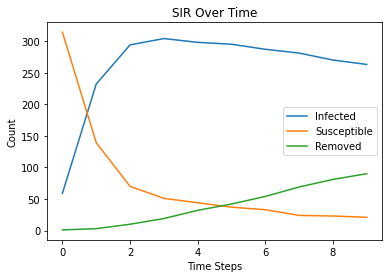

Testing with Vaccination Budget: 1, Test Accuracy: 1.0
Iteration 1: Infected=106, Susceptible=267, Removed=1
Iteration 2: Infected=249, Susceptible=119, Removed=6
Iteration 3: Infected=294, Susceptible=61, Removed=19
Iteration 4: Infected=291, Susceptible=47, Removed=36
Iteration 5: Infected=285, Susceptible=36, Removed=53
Iteration 6: Infected=273, Susceptible=31, Removed=70
Iteration 7: Infected=257, Susceptible=30, Removed=87
Iteration 8: Infected=248, Susceptible=27, Removed=99
Iteration 9: Infected=241, Susceptible=24, Removed=109
Iteration 10: Infected=230, Susceptible=22, Removed=122


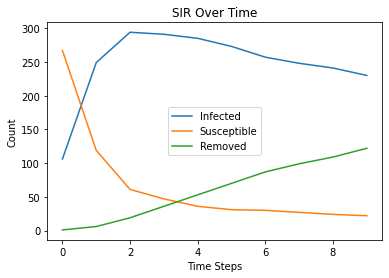

Testing with Vaccination Budget: 3, Test Accuracy: 0.5
Iteration 1: Infected=11, Susceptible=360, Removed=3
Iteration 2: Infected=80, Susceptible=291, Removed=3
Iteration 3: Infected=237, Susceptible=134, Removed=3
Iteration 4: Infected=289, Susceptible=75, Removed=10
Iteration 5: Infected=301, Susceptible=52, Removed=21
Iteration 6: Infected=304, Susceptible=40, Removed=30
Iteration 7: Infected=305, Susceptible=32, Removed=37
Iteration 8: Infected=301, Susceptible=28, Removed=45
Iteration 9: Infected=295, Susceptible=26, Removed=53
Iteration 10: Infected=287, Susceptible=25, Removed=62


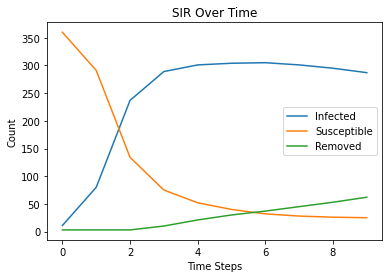

Testing with Vaccination Budget: 3, Test Accuracy: 0.75
Iteration 1: Infected=7, Susceptible=362, Removed=5
Iteration 2: Infected=73, Susceptible=296, Removed=5
Iteration 3: Infected=224, Susceptible=142, Removed=8
Iteration 4: Infected=280, Susceptible=79, Removed=15
Iteration 5: Infected=285, Susceptible=59, Removed=30
Iteration 6: Infected=283, Susceptible=46, Removed=45
Iteration 7: Infected=278, Susceptible=41, Removed=55
Iteration 8: Infected=264, Susceptible=38, Removed=72
Iteration 9: Infected=254, Susceptible=36, Removed=84
Iteration 10: Infected=245, Susceptible=32, Removed=97


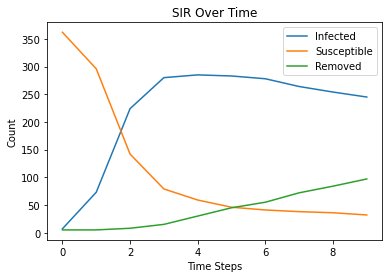

Testing with Vaccination Budget: 3, Test Accuracy: 1.0
Iteration 1: Infected=22, Susceptible=349, Removed=3
Iteration 2: Infected=137, Susceptible=232, Removed=5
Iteration 3: Infected=247, Susceptible=114, Removed=13
Iteration 4: Infected=276, Susceptible=70, Removed=28
Iteration 5: Infected=281, Susceptible=49, Removed=44
Iteration 6: Infected=275, Susceptible=41, Removed=58
Iteration 7: Infected=263, Susceptible=39, Removed=72
Iteration 8: Infected=251, Susceptible=36, Removed=87
Iteration 9: Infected=241, Susceptible=33, Removed=100
Iteration 10: Infected=228, Susceptible=32, Removed=114


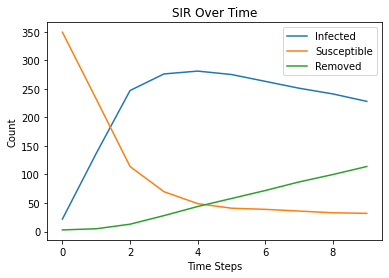

Testing with Vaccination Budget: 5, Test Accuracy: 0.5
Iteration 1: Infected=21, Susceptible=348, Removed=5
Iteration 2: Infected=125, Susceptible=244, Removed=5
Iteration 3: Infected=246, Susceptible=120, Removed=8
Iteration 4: Infected=293, Susceptible=69, Removed=12
Iteration 5: Infected=310, Susceptible=46, Removed=18
Iteration 6: Infected=315, Susceptible=35, Removed=24
Iteration 7: Infected=309, Susceptible=31, Removed=34
Iteration 8: Infected=305, Susceptible=29, Removed=40
Iteration 9: Infected=297, Susceptible=28, Removed=49
Iteration 10: Infected=291, Susceptible=27, Removed=56


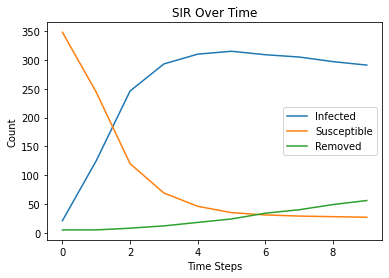

Testing with Vaccination Budget: 5, Test Accuracy: 0.75
Iteration 1: Infected=80, Susceptible=290, Removed=4
Iteration 2: Infected=237, Susceptible=131, Removed=6
Iteration 3: Infected=283, Susceptible=79, Removed=12
Iteration 4: Infected=296, Susceptible=53, Removed=25
Iteration 5: Infected=293, Susceptible=46, Removed=35
Iteration 6: Infected=293, Susceptible=35, Removed=46
Iteration 7: Infected=287, Susceptible=30, Removed=57
Iteration 8: Infected=280, Susceptible=28, Removed=66
Iteration 9: Infected=270, Susceptible=27, Removed=77
Iteration 10: Infected=260, Susceptible=25, Removed=89


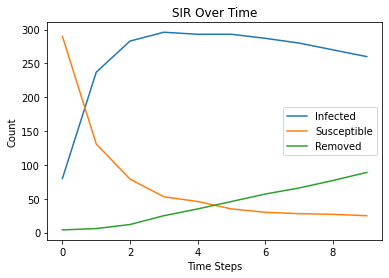

Testing with Vaccination Budget: 5, Test Accuracy: 1.0
Iteration 1: Infected=58, Susceptible=311, Removed=5
Iteration 2: Infected=209, Susceptible=158, Removed=7
Iteration 3: Infected=258, Susceptible=91, Removed=25
Iteration 4: Infected=277, Susceptible=57, Removed=40
Iteration 5: Infected=284, Susceptible=39, Removed=51
Iteration 6: Infected=273, Susceptible=36, Removed=65
Iteration 7: Infected=261, Susceptible=33, Removed=80
Iteration 8: Infected=247, Susceptible=32, Removed=95
Iteration 9: Infected=232, Susceptible=32, Removed=110
Iteration 10: Infected=220, Susceptible=30, Removed=124


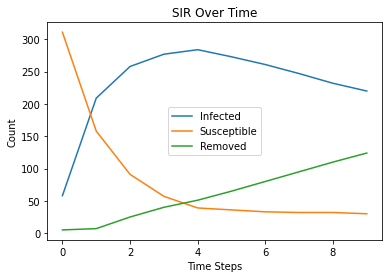

Testing with Vaccination Budget: 10, Test Accuracy: 0.5
Iteration 1: Infected=36, Susceptible=328, Removed=10
Iteration 2: Infected=174, Susceptible=189, Removed=11
Iteration 3: Infected=250, Susceptible=106, Removed=18
Iteration 4: Infected=283, Susceptible=68, Removed=23
Iteration 5: Infected=298, Susceptible=46, Removed=30
Iteration 6: Infected=297, Susceptible=38, Removed=39
Iteration 7: Infected=291, Susceptible=32, Removed=51
Iteration 8: Infected=285, Susceptible=31, Removed=58
Iteration 9: Infected=278, Susceptible=30, Removed=66
Iteration 10: Infected=271, Susceptible=30, Removed=73


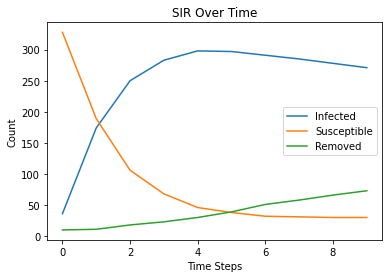

Testing with Vaccination Budget: 10, Test Accuracy: 0.75
Iteration 1: Infected=63, Susceptible=301, Removed=10
Iteration 2: Infected=218, Susceptible=143, Removed=13
Iteration 3: Infected=279, Susceptible=75, Removed=20
Iteration 4: Infected=290, Susceptible=50, Removed=34
Iteration 5: Infected=292, Susceptible=38, Removed=44
Iteration 6: Infected=284, Susceptible=34, Removed=56
Iteration 7: Infected=276, Susceptible=32, Removed=66
Iteration 8: Infected=267, Susceptible=30, Removed=77
Iteration 9: Infected=261, Susceptible=28, Removed=85
Iteration 10: Infected=251, Susceptible=27, Removed=96


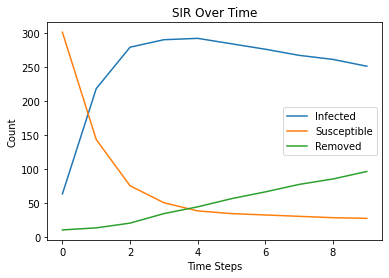

Testing with Vaccination Budget: 10, Test Accuracy: 1.0
Iteration 1: Infected=18, Susceptible=346, Removed=10
Iteration 2: Infected=111, Susceptible=252, Removed=11
Iteration 3: Infected=222, Susceptible=135, Removed=17
Iteration 4: Infected=266, Susceptible=79, Removed=29
Iteration 5: Infected=272, Susceptible=59, Removed=43
Iteration 6: Infected=271, Susceptible=45, Removed=58
Iteration 7: Infected=260, Susceptible=40, Removed=74
Iteration 8: Infected=245, Susceptible=40, Removed=89
Iteration 9: Infected=232, Susceptible=38, Removed=104
Iteration 10: Infected=220, Susceptible=38, Removed=116


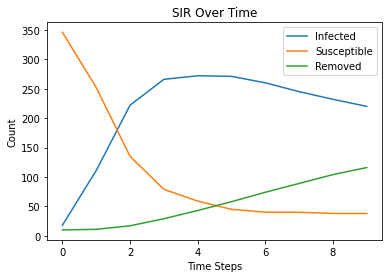

In [14]:

# Parameters
total_tests = 200
max_tests_per_iteration = 20
vaccination_budgets = [1, 3, 5, 10]
test_accuracies = [0.5, 0.75, 1.0]
transmission_probability = 0.35

# Create a random network (you can replace this with your specific network)
G = nx.Graph(adjacency_matrix)

def run_simulation(G, initial_infected, total_tests, max_tests_per_iteration, vaccination_budget, test_accuracy, transmission_probability):
    # Initialize the status of nodes: 0 for susceptible, 1 for infected, and 2 for removed
    node_status = {node: 0 for node in G.nodes()}

    # Select a random initial set of infected nodes
    initial_infected_nodes = random.sample(list(G.nodes()), initial_infected)
    for node in initial_infected_nodes:
        node_status[node] = 1

    # Lists to store SIR counts at each step
    infected_counts = []
    susceptible_counts = []
    removed_counts = []

    # Run the simulation
    for iteration in range(total_tests // max_tests_per_iteration):
        # Calculate degree centrality for each node
        degree_centrality = nx.degree_centrality(G)

        # Sort nodes based on degree centrality (highest to lowest)
        sorted_nodes = sorted(degree_centrality, key=degree_centrality.get, reverse=True)

                # Perform testing
        tested_nodes = random.sample(list(G.nodes()), max_tests_per_iteration)
        for node in tested_nodes:
            if node_status[node] == 1 and random.random() <= test_accuracy:
                # Node is infected and the test is accurate
                node_status[node] = 2  # Move to the removed state

        # Allocate vaccinations to the top N nodes with the highest degree centrality
        for i in range(vaccination_budget):
            node = sorted_nodes[i]
            if node_status[node] == 0:
                node_status[node] = 2  # Move to the removed state


        # Disease spread: Infected nodes can infect susceptible neighbors
        for node in G.nodes():
            if node_status[node] == 1:  # Node is infected
                neighbors = list(G.neighbors(node))
                for neighbor in neighbors:
                    if node_status[neighbor] == 0 and random.random() <= transmission_probability:
                        node_status[neighbor] = 1  # Neighbor becomes infected

        # Calculate SIR counts at this step
        infected_count = sum(1 for status in node_status.values() if status == 1)
        susceptible_count = sum(1 for status in node_status.values() if status == 0)
        removed_count = sum(1 for status in node_status.values() if status == 2)

        infected_counts.append(infected_count)
        susceptible_counts.append(susceptible_count)
        removed_counts.append(removed_count)

        print(f"Iteration {iteration + 1}: Infected={infected_count}, Susceptible={susceptible_count}, Removed={removed_count}")

    # Plot SIR counts over time
    plt.plot(infected_counts, label='Infected')
    plt.plot(susceptible_counts, label='Susceptible')
    plt.plot(removed_counts, label='Removed')
    plt.xlabel('Time Steps')
    plt.ylabel('Count')
    plt.legend()
    plt.title('SIR Over Time')
    plt.show()

# Test different combinations of vaccination budgets and test accuracies
for vaccination_budget in vaccination_budgets:
    for test_accuracy in test_accuracies:
        print(f"Testing with Vaccination Budget: {vaccination_budget}, Test Accuracy: {test_accuracy}")
        run_simulation(G, initial_infected=5, total_tests=total_tests, max_tests_per_iteration=max_tests_per_iteration, vaccination_budget=vaccination_budget, test_accuracy=test_accuracy, transmission_probability=transmission_probability)

Testing with Vaccination Budget: 1, Test Accuracy: 0.5
Iteration 1: Infected=133, Susceptible=240, Removed=1
Iteration 2: Infected=274, Susceptible=90, Removed=10
Iteration 3: Infected=298, Susceptible=56, Removed=20
Iteration 4: Infected=306, Susceptible=39, Removed=29
Iteration 5: Infected=296, Susceptible=33, Removed=45
Iteration 6: Infected=293, Susceptible=28, Removed=53
Iteration 7: Infected=287, Susceptible=24, Removed=63
Iteration 8: Infected=278, Susceptible=23, Removed=73
Iteration 9: Infected=273, Susceptible=21, Removed=80
Iteration 10: Infected=264, Susceptible=20, Removed=90


/var/folders/lf/9kmpp6sj6r5336sq3nv74tjw0000gn/T/ipykernel_1535/3541777157.py:16: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  return random.sample(testing_candidates, min(max_tests, len(testing_candidates)))


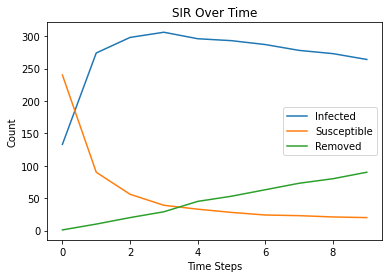

Testing with Vaccination Budget: 1, Test Accuracy: 0.75
Iteration 1: Infected=35, Susceptible=338, Removed=1
Iteration 2: Infected=203, Susceptible=165, Removed=6
Iteration 3: Infected=272, Susceptible=86, Removed=16
Iteration 4: Infected=289, Susceptible=55, Removed=30
Iteration 5: Infected=293, Susceptible=38, Removed=43
Iteration 6: Infected=285, Susceptible=32, Removed=57
Iteration 7: Infected=277, Susceptible=29, Removed=68
Iteration 8: Infected=267, Susceptible=26, Removed=81
Iteration 9: Infected=260, Susceptible=24, Removed=90
Iteration 10: Infected=247, Susceptible=22, Removed=105


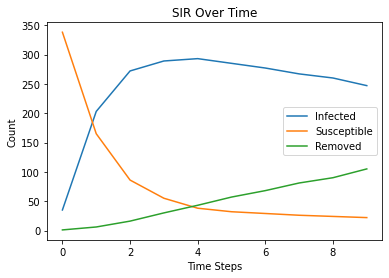

Testing with Vaccination Budget: 1, Test Accuracy: 1.0
Iteration 1: Infected=54, Susceptible=319, Removed=1
Iteration 2: Infected=192, Susceptible=174, Removed=8
Iteration 3: Infected=276, Susceptible=73, Removed=25
Iteration 4: Infected=280, Susceptible=51, Removed=43
Iteration 5: Infected=274, Susceptible=40, Removed=60
Iteration 6: Infected=264, Susceptible=33, Removed=77
Iteration 7: Infected=249, Susceptible=29, Removed=96
Iteration 8: Infected=236, Susceptible=28, Removed=110
Iteration 9: Infected=222, Susceptible=26, Removed=126
Iteration 10: Infected=211, Susceptible=25, Removed=138


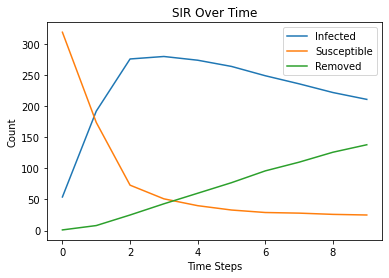

Testing with Vaccination Budget: 3, Test Accuracy: 0.5
Iteration 1: Infected=22, Susceptible=349, Removed=3
Iteration 2: Infected=171, Susceptible=197, Removed=6
Iteration 3: Infected=251, Susceptible=102, Removed=21
Iteration 4: Infected=282, Susceptible=64, Removed=28
Iteration 5: Infected=287, Susceptible=49, Removed=38
Iteration 6: Infected=283, Susceptible=41, Removed=50
Iteration 7: Infected=281, Susceptible=31, Removed=62
Iteration 8: Infected=277, Susceptible=27, Removed=70
Iteration 9: Infected=272, Susceptible=23, Removed=79
Iteration 10: Infected=265, Susceptible=20, Removed=89


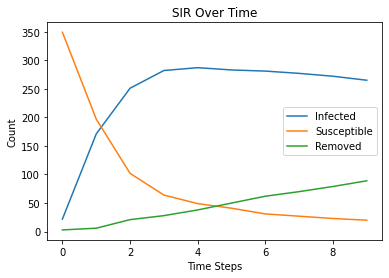

Testing with Vaccination Budget: 3, Test Accuracy: 0.75
Iteration 1: Infected=15, Susceptible=356, Removed=3
Iteration 2: Infected=38, Susceptible=329, Removed=7
Iteration 3: Infected=192, Susceptible=170, Removed=12
Iteration 4: Infected=255, Susceptible=93, Removed=26
Iteration 5: Infected=269, Susceptible=64, Removed=41
Iteration 6: Infected=271, Susceptible=47, Removed=56
Iteration 7: Infected=263, Susceptible=41, Removed=70
Iteration 8: Infected=259, Susceptible=32, Removed=83
Iteration 9: Infected=249, Susceptible=29, Removed=96
Iteration 10: Infected=236, Susceptible=26, Removed=112


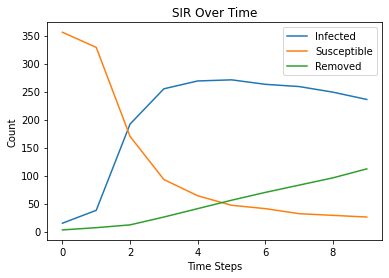

Testing with Vaccination Budget: 3, Test Accuracy: 1.0
Iteration 1: Infected=31, Susceptible=340, Removed=3
Iteration 2: Infected=155, Susceptible=211, Removed=8
Iteration 3: Infected=240, Susceptible=110, Removed=24
Iteration 4: Infected=263, Susceptible=71, Removed=40
Iteration 5: Infected=263, Susceptible=52, Removed=59
Iteration 6: Infected=252, Susceptible=44, Removed=78
Iteration 7: Infected=239, Susceptible=37, Removed=98
Iteration 8: Infected=226, Susceptible=32, Removed=116
Iteration 9: Infected=217, Susceptible=29, Removed=128
Iteration 10: Infected=204, Susceptible=25, Removed=145


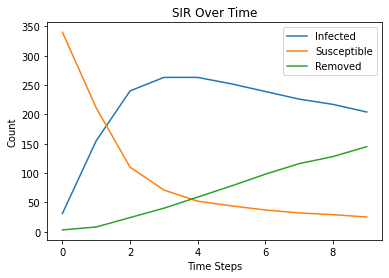

Testing with Vaccination Budget: 5, Test Accuracy: 0.5
Iteration 1: Infected=47, Susceptible=321, Removed=6
Iteration 2: Infected=185, Susceptible=175, Removed=14
Iteration 3: Infected=255, Susceptible=95, Removed=24
Iteration 4: Infected=279, Susceptible=61, Removed=34
Iteration 5: Infected=282, Susceptible=45, Removed=47
Iteration 6: Infected=281, Susceptible=36, Removed=57
Iteration 7: Infected=275, Susceptible=29, Removed=70
Iteration 8: Infected=268, Susceptible=22, Removed=84
Iteration 9: Infected=261, Susceptible=16, Removed=97
Iteration 10: Infected=255, Susceptible=11, Removed=108


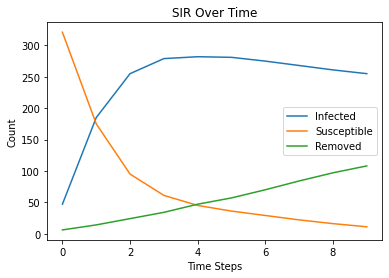

Testing with Vaccination Budget: 5, Test Accuracy: 0.75
Iteration 1: Infected=47, Susceptible=322, Removed=5
Iteration 2: Infected=167, Susceptible=192, Removed=15
Iteration 3: Infected=243, Susceptible=105, Removed=26
Iteration 4: Infected=262, Susceptible=71, Removed=41
Iteration 5: Infected=260, Susceptible=55, Removed=59
Iteration 6: Infected=256, Susceptible=45, Removed=73
Iteration 7: Infected=244, Susceptible=40, Removed=90
Iteration 8: Infected=233, Susceptible=34, Removed=107
Iteration 9: Infected=228, Susceptible=28, Removed=118
Iteration 10: Infected=216, Susceptible=23, Removed=135


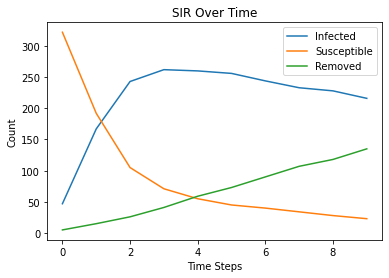

Testing with Vaccination Budget: 5, Test Accuracy: 1.0
Iteration 1: Infected=12, Susceptible=357, Removed=5
Iteration 2: Infected=102, Susceptible=260, Removed=12
Iteration 3: Infected=222, Susceptible=131, Removed=21
Iteration 4: Infected=249, Susceptible=88, Removed=37
Iteration 5: Infected=249, Susceptible=65, Removed=60
Iteration 6: Infected=238, Susceptible=54, Removed=82
Iteration 7: Infected=229, Susceptible=44, Removed=101
Iteration 8: Infected=219, Susceptible=36, Removed=119
Iteration 9: Infected=209, Susceptible=29, Removed=136
Iteration 10: Infected=196, Susceptible=24, Removed=154


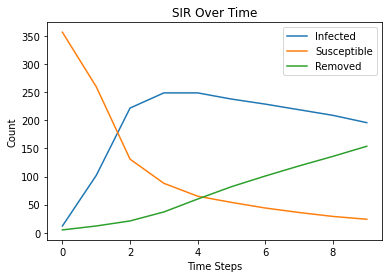

Testing with Vaccination Budget: 10, Test Accuracy: 0.5
Iteration 1: Infected=30, Susceptible=334, Removed=10
Iteration 2: Infected=142, Susceptible=212, Removed=20
Iteration 3: Infected=218, Susceptible=120, Removed=36
Iteration 4: Infected=247, Susceptible=77, Removed=50
Iteration 5: Infected=245, Susceptible=59, Removed=70
Iteration 6: Infected=244, Susceptible=44, Removed=86
Iteration 7: Infected=238, Susceptible=31, Removed=105
Iteration 8: Infected=233, Susceptible=21, Removed=120
Iteration 9: Infected=224, Susceptible=11, Removed=139
Iteration 10: Infected=215, Susceptible=1, Removed=158


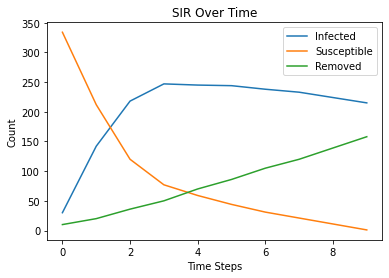

Testing with Vaccination Budget: 10, Test Accuracy: 0.75
Iteration 1: Infected=38, Susceptible=326, Removed=10
Iteration 2: Infected=149, Susceptible=202, Removed=23
Iteration 3: Infected=194, Susceptible=135, Removed=45
Iteration 4: Infected=210, Susceptible=104, Removed=60
Iteration 5: Infected=215, Susceptible=82, Removed=77
Iteration 6: Infected=209, Susceptible=68, Removed=97
Iteration 7: Infected=202, Susceptible=57, Removed=115
Iteration 8: Infected=189, Susceptible=47, Removed=138
Iteration 9: Infected=184, Susceptible=33, Removed=157
Iteration 10: Infected=174, Susceptible=23, Removed=177


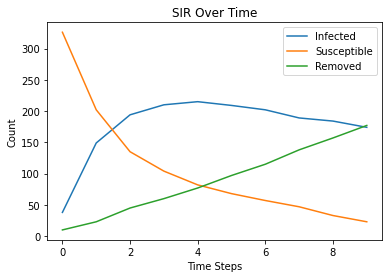

Testing with Vaccination Budget: 10, Test Accuracy: 1.0
Iteration 1: Infected=12, Susceptible=352, Removed=10
Iteration 2: Infected=39, Susceptible=313, Removed=22
Iteration 3: Infected=91, Susceptible=247, Removed=36
Iteration 4: Infected=117, Susceptible=198, Removed=59
Iteration 5: Infected=148, Susceptible=148, Removed=78
Iteration 6: Infected=161, Susceptible=116, Removed=97
Iteration 7: Infected=152, Susceptible=102, Removed=120
Iteration 8: Infected=142, Susceptible=88, Removed=144
Iteration 9: Infected=138, Susceptible=76, Removed=160
Iteration 10: Infected=133, Susceptible=63, Removed=178


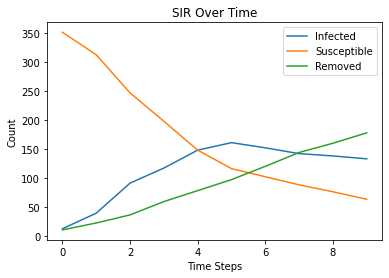

In [13]:
# Parameters
total_tests = 200
max_tests_per_iteration = 20
vaccination_budgets = [1, 3, 5, 10]
test_accuracies = [0.5, 0.75, 1.0]
transmission_probability = 0.35

def adaptive_testing(G, node_status, max_tests):
    # Prioritize testing nodes connected to infected nodes
    infected_neighbors = [node for node in G.nodes() if node_status[node] == 1]
    testing_candidates = set()
    for infected_node in infected_neighbors:
        testing_candidates.update(list(G.neighbors(infected_node)))

    # Randomly select up to `max_tests` candidates from the testing pool
    return random.sample(testing_candidates, min(max_tests, len(testing_candidates)))

def adaptive_vaccination(G, node_status, budget):
    # Prioritize vaccination of high-degree nodes close to infected nodes
    node_centrality = nx.degree_centrality(G)
    sorted_nodes = sorted(G.nodes(), key=lambda node: (-node_centrality[node], len(set(G.neighbors(node)) & set([n for n, s in node_status.items() if s == 1]))))

    # Select nodes for vaccination, ensuring they are not infected or removed
    selected_nodes = [node for node in sorted_nodes if node_status[node] == 0][:budget]
    return selected_nodes

def run_simulation(G, initial_infected, total_tests, max_tests_per_iteration, vaccination_budget, test_accuracy, transmission_probability):
    # Initialize the status of nodes: 0 for susceptible, 1 for infected, and 2 for removed
    node_status = {node: 0 for node in G.nodes()}

    # Select a random initial set of infected nodes
    initial_infected_nodes = random.sample(list(G.nodes()), initial_infected)
    for node in initial_infected_nodes:
        node_status[node] = 1

    # Lists to store SIR counts at each step
    infected_counts = []
    susceptible_counts = []
    removed_counts = []

    # Run the simulation
    for iteration in range(total_tests // max_tests_per_iteration):
        # Select nodes for testing and perform testing
        tested_nodes = adaptive_testing(G, node_status, max_tests_per_iteration)
        for node in tested_nodes:
            if node_status[node] == 1 and random.random() <= test_accuracy:
                # Node is infected and the test is accurate
                node_status[node] = 2  # Move to the removed state

        # Select nodes for vaccination and perform vaccination
        vaccinated_nodes = adaptive_vaccination(G, node_status, vaccination_budget)
        for node in vaccinated_nodes:
            node_status[node] = 2  # Move to the removed state

        # Disease spread: Infected nodes can infect susceptible neighbors
        for node in G.nodes():
            if node_status[node] == 1:  # Node is infected
                neighbors = list(G.neighbors(node))
                for neighbor in neighbors:
                    if node_status[neighbor] == 0 and random.random() <= transmission_probability:
                        node_status[neighbor] = 1  # Neighbor becomes infected

        # Calculate SIR counts at this step
        infected_count = sum(1 for status in node_status.values() if status == 1)
        susceptible_count = sum(1 for status in node_status.values() if status == 0)
        removed_count = sum(1 for status in node_status.values() if status == 2)

        infected_counts.append(infected_count)
        susceptible_counts.append(susceptible_count)
        removed_counts.append(removed_count)

        print(f"Iteration {iteration + 1}: Infected={infected_count}, Susceptible={susceptible_count}, Removed={removed_count}")

    # Plot SIR counts over time
    plt.plot(infected_counts, label='Infected')
    plt.plot(susceptible_counts, label='Susceptible')
    plt.plot(removed_counts, label='Removed')
    plt.xlabel('Time Steps')
    plt.ylabel('Count')
    plt.legend()
    plt.title('SIR Over Time')
    plt.show()

# Test the adaptive strategy with vaccination budget 10 and high test accuracy
for vaccination_budget in vaccination_budgets:
    for test_accuracy in test_accuracies:
        print(f"Testing with Vaccination Budget: {vaccination_budget}, Test Accuracy: {test_accuracy}")
        run_simulation(G, initial_infected=5, total_tests=total_tests, max_tests_per_iteration=max_tests_per_iteration, vaccination_budget=vaccination_budget, test_accuracy=test_accuracy, transmission_probability=transmission_probability)
        